In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [4]:
dados = pd.read_csv("Dados_Incendio.csv", encoding='latin-1')

In [5]:
dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [7]:
dados.shape

(6454, 5)

In [9]:
dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

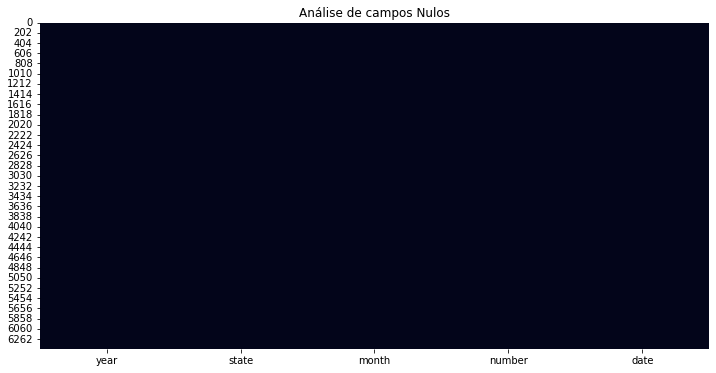

In [20]:
# nulos plot 
plt.figure(figsize=(12,6))
plt.title('Análise de campos Nulos')
sns.heatmap(dados.isnull(), cbar=False);
#nao tem nenhum dados nulos

In [21]:
# Estatística
dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [22]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [24]:
# campos unicos
dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

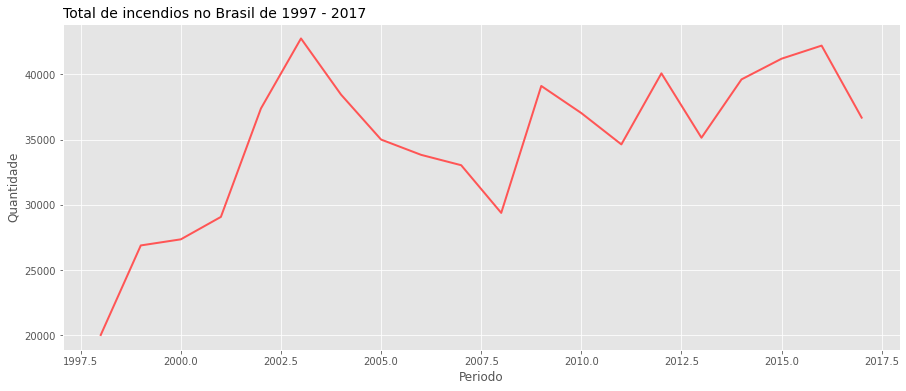

In [33]:
# análise por ano dos incendios 

analise = dados.groupby(by=['year']).sum().reset_index()

analise.head()

# Style 
plt.style.use('ggplot')

# Gráfico 
plt.figure(figsize=(15,6))
plt.title("Total de incendios no Brasil de 1997 - 2017", loc='left', fontsize=14)
sns.lineplot( data=analise, x ='year', y='number', estimator='sum', lw=2, color='#ff5555');

plt.xlabel('Periodo')
plt.ylabel('Quantidade');


Text(0, 0.5, 'Período')

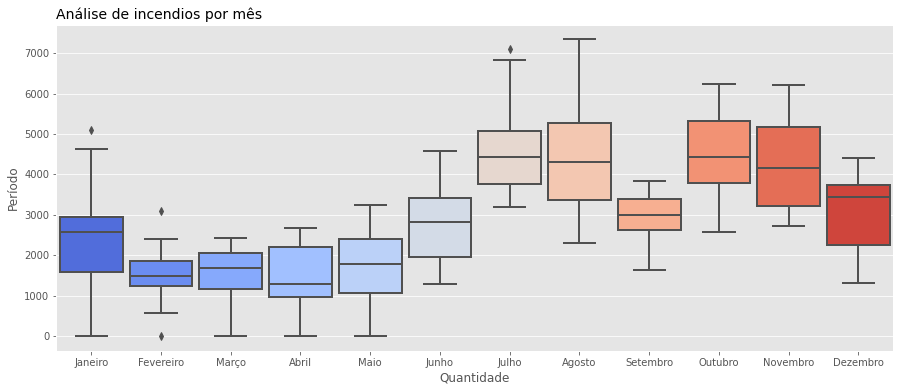

In [62]:
analise2= dados.groupby( by=['year','month']).sum().reset_index()



plt.figure(figsize=(15,6))
plt.title("Análise de incendios por mês", loc='left', fontsize=14)
sns.boxplot(data=analise2, x='month', y='number', palette = 'coolwarm',saturation = 1, width=0.9, linewidth=2,
            order = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho',
            'Julho', 'Agosto','Setembro','Outubro', 'Novembro', 'Dezembro']);

plt.xlabel('Quantidade')
plt.ylabel('Período')


In [88]:
paleta_cores = sns.color_palette('Reds_r',25)
paleta_cores

[(0.4725720876585929, 0.01660899653979239, 0.059838523644752006),
 (0.5488504421376394, 0.035063437139561705, 0.06968089196462898),
 (0.6251287966166859, 0.053517877739331025, 0.07952326028450594),
 (0.6803690888119954, 0.06671280276816609, 0.08936562860438292),
 (0.727120338331411, 0.07778546712802767, 0.09920799692425988),
 (0.7738715878508265, 0.08885813148788926, 0.10905036524413686),
 (0.8149019607843137, 0.11241830065359477, 0.12156862745098039),
 (0.85919261822376, 0.15547866205305652, 0.1400230680507497),
 (0.9034832756632064, 0.19853902345251828, 0.15847750865051902),
 (0.9407612456747405, 0.2451057285659361, 0.1813148788927335),
 (0.9555247981545559, 0.30292964244521337, 0.2182237600922722),
 (0.9702883506343714, 0.3607535563244906, 0.25513264129181085),
 (0.9843752402921953, 0.4181468665897732, 0.2926566705113418),
 (0.9854825067281815, 0.46243752402921956, 0.3369473279507882),
 (0.9867128027681661, 0.5116493656286044, 0.38615916955017304),
 (0.9879430988081508, 0.5608612072279893, 0.4353710111495579),
 (0.9882352941176471, 0.6110111495578623, 0.49114955786236064),
 (0.9882352941176471, 0.6614532871972318, 0.5489734717416378),
 (0.9882352941176471, 0.7118954248366013, 0.606797385620915),
 (0.9894040753556325, 0.7549557862360629, 0.6600076893502497),
 (0.9918646674356018, 0.800476739715494, 0.7202921953094963),
 (0.9943252595155709, 0.845997693194925, 0.7805767012687428),
 (0.9964321414840446, 0.8858592848904268, 0.8341407151095732),
 (0.9976624375240293, 0.9116955017301038, 0.8710495963091118),
 (0.9988927335640139, 0.9375317185697809, 0.9079584775086504)]

In [152]:
bd_dados['number'].value_counts(normalize = 'True')


0.000      0.095600
1.000      0.036721
2.000      0.026960
3.000      0.022157
4.000      0.017818
             ...   
325.000    0.000155
655.000    0.000155
705.000    0.000155
1.085      0.000155
623.000    0.000155
Name: number, Length: 1479, dtype: float64

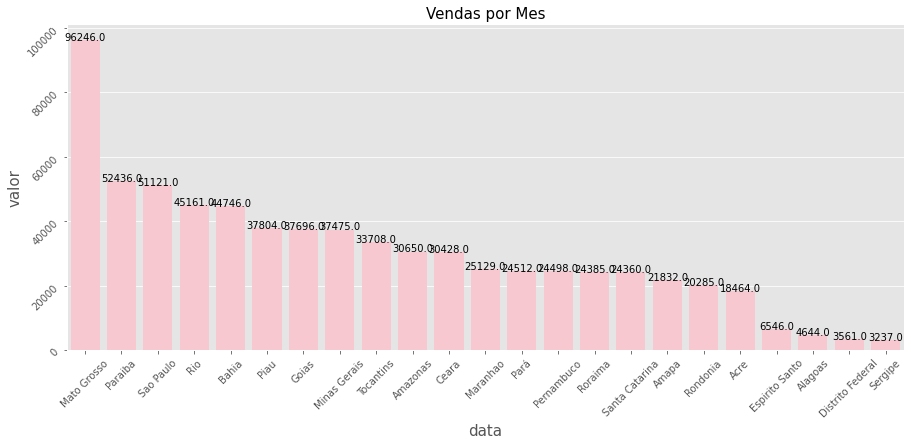

In [248]:
# Gráfico por estados
analise_porestados = round(dados.groupby(by=['state']).sum().reset_index().sort_values('number',ascending=False))


plt.figure(figsize=(15,6))
ax = sns.barplot(data=analise_porestados, x='state',y='number', color = 'pink')
plt.xticks(rotation=90)
ax.set_title('Vendas por Mes', fontsize = 15)
ax.set_xlabel('data',fontsize = 15)
ax.set_ylabel('valor',fontsize=15)
ax.tick_params(labelrotation=45)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:.1f}'.format((height)),
  ha='center')


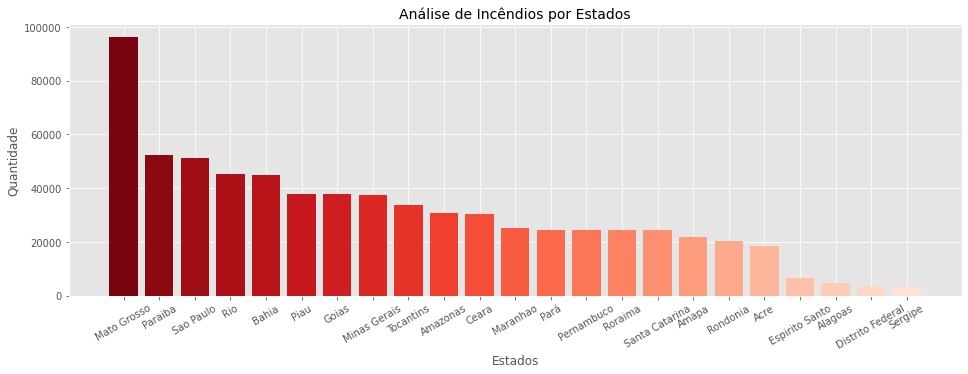

In [250]:
# Gráfico por estados
analise_porestados = dados.groupby(by=['state']).sum().reset_index().sort_values('number',ascending=False)

plt.figure(figsize=(16,5))
y = analise_p
plt.title('Análise de Incêndios por Estados', fontsize=14)
plt.bar(analise_porestados.state, analise_porestados['number'], color=paleta_cores)
plt.xlabel('Estados')
plt.ylabel('Quantidade')
plt.xticks(rotation=30);

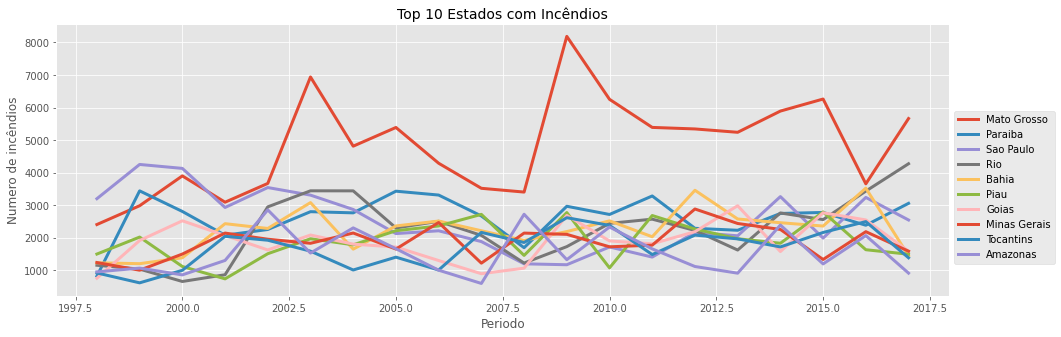

In [116]:
lista_top10= analise_porestados['state'][0:10].values

plt.figure(figsize=(16,5))

plt.title('Top 10 Estados com Incêndios', fontsize=14,)

for colunas in lista_top10:
  filtro= dados.loc[dados['state']== colunas]
  analise_local = filtro.groupby(by=['year']).sum().reset_index()
  sns.lineplot(data=analise_local, x='year', y='number', lw=3)
  plt.xlabel('Periodo')
  plt.ylabel('Numero de incêndios')

  # Legenda 
  plt.legend(lista_top10, bbox_to_anchor=(1,0.7));      

In [139]:
estados = analise_porestados.sort_values('state')['state'].values

valores = analise_porestados.sort_values('number')['number'].values

# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Lon = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

dic = {
    'Estados': estados,
    'Latitude': Lat,
    'Longitude': Lon,
    'Incêndios': valores
}

analise_geo = pd.DataFrame(dic)

analise_geo.head()



,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,3237.00
1,Alagoas,-9.71,-35.73,3561.00
2,Amapa,1.41,-51.77,4644.00
3,Amazonas,-3.07,-61.66,6546.00
4,Bahia,-12.96,-38.51,18464.03


In [144]:
import plotly.express as px

px.density_mapbox(
    analise_geo, 
    lat='Latitude',
    lon= 'Longitude',
    z= 'Incêndios',
    radius= 30, 
    center= dict(lat= 12.700, lon=-46.5555),
    zoom = 3,
    mapbox_style='stamen_terrain'
)